# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographic_density']
N_COMPONENTS = 3

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.continuous, source=Source.majority, past=Past.all, durl=Durl.all)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = substitution.features(feature,
                                                                sentence_relative='median')
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'source': source,
                         'source_rel': source_rel,
                         'destination': destination,
                         'destination_rel': destination_rel,
                         'h0': substitution.feature_average(feature),
                         'h0_rel': substitution.feature_average(feature,
                                                                sentence_relative='median'),
                         'h0n': substitution.feature_average(feature,
                                                             source_synonyms=True),
                         'h0n_rel': substitution.feature_average(feature,
                                                                 source_synonyms=True,
                                                                 sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 18226 substitutions for model Model(time=Time.continuous, source=Source.majority, past=Past.all, durl=Durl.all)


  0% (    1 of 18226) |           | Elapsed Time: 0:00:26 ETA:  5 days, 12:44:08

  0% (   79 of 18226) |                    | Elapsed Time: 0:00:27 ETA:  0:03:28

  0% (  161 of 18226) |                    | Elapsed Time: 0:00:28 ETA:  0:03:21

  1% (  228 of 18226) |                    | Elapsed Time: 0:00:29 ETA:  0:03:24

  1% (  305 of 18226) |                    | Elapsed Time: 0:00:30 ETA:  0:03:24

  2% (  385 of 18226) |                    | Elapsed Time: 0:00:31 ETA:  0:03:22

  2% (  456 of 18226) |                    | Elapsed Time: 0:00:32 ETA:  0:03:21

  2% (  534 of 18226) |                    | Elapsed Time: 0:00:33 ETA:  0:03:20

  3% (  612 of 18226) |                    | Elapsed Time: 0:00:34 ETA:  0:03:19

  3% (  684 of 18226) |                    | Elapsed Time: 0:00:34 ETA:  0:03:18

  4% (  760 of 18226) |                    | Elapsed Time: 0:00:35 ETA:  0:03:18

  4% (  836 of 18226) |                    | Elapsed Time: 0:00:37 ETA:  0:03:19

  5% (  912 of 18226) |#                   | Elapsed Time: 0:00:38 ETA:  0:03:18

  5% (  993 of 18226) |#                   | Elapsed Time: 0:00:39 ETA:  0:03:17

  5% ( 1065 of 18226) |#                   | Elapsed Time: 0:00:40 ETA:  0:03:18

  6% ( 1140 of 18226) |#                   | Elapsed Time: 0:00:40 ETA:  0:03:15

  6% ( 1221 of 18226) |#                   | Elapsed Time: 0:00:41 ETA:  0:03:13

  7% ( 1284 of 18226) |#                   | Elapsed Time: 0:00:43 ETA:  0:03:34

  7% ( 1367 of 18226) |#                   | Elapsed Time: 0:00:44 ETA:  0:03:33

  7% ( 1443 of 18226) |#                   | Elapsed Time: 0:00:45 ETA:  0:03:32

  8% ( 1522 of 18226) |#                   | Elapsed Time: 0:00:46 ETA:  0:03:28

  8% ( 1595 of 18226) |#                   | Elapsed Time: 0:00:47 ETA:  0:03:29

  9% ( 1673 of 18226) |#                   | Elapsed Time: 0:00:48 ETA:  0:03:25

  9% ( 1754 of 18226) |#                   | Elapsed Time: 0:00:49 ETA:  0:03:25

 10% ( 1823 of 18226) |##                  | Elapsed Time: 0:00:50 ETA:  0:03:25

 10% ( 1903 of 18226) |##                  | Elapsed Time: 0:00:51 ETA:  0:03:01

 10% ( 1978 of 18226) |##                  | Elapsed Time: 0:00:52 ETA:  0:03:02

 11% ( 2051 of 18226) |##                  | Elapsed Time: 0:00:53 ETA:  0:03:02

 11% ( 2131 of 18226) |##                  | Elapsed Time: 0:00:54 ETA:  0:03:00

 12% ( 2207 of 18226) |##                  | Elapsed Time: 0:00:55 ETA:  0:03:00

 12% ( 2279 of 18226) |##                  | Elapsed Time: 0:00:56 ETA:  0:02:58

 12% ( 2359 of 18226) |##                  | Elapsed Time: 0:00:57 ETA:  0:02:56

 13% ( 2443 of 18226) |##                  | Elapsed Time: 0:00:58 ETA:  0:02:54

 13% ( 2507 of 18226) |##                  | Elapsed Time: 0:00:59 ETA:  0:02:53

 14% ( 2585 of 18226) |##                  | Elapsed Time: 0:01:00 ETA:  0:02:53

 14% ( 2661 of 18226) |##                  | Elapsed Time: 0:01:01 ETA:  0:02:52

 15% ( 2734 of 18226) |###                 | Elapsed Time: 0:01:02 ETA:  0:02:48

 15% ( 2816 of 18226) |###                 | Elapsed Time: 0:01:03 ETA:  0:02:47

 15% ( 2898 of 18226) |###                 | Elapsed Time: 0:01:04 ETA:  0:02:44

 16% ( 2962 of 18226) |###                 | Elapsed Time: 0:01:04 ETA:  0:02:43

 16% ( 3042 of 18226) |###                 | Elapsed Time: 0:01:05 ETA:  0:02:42

 17% ( 3109 of 18226) |###                 | Elapsed Time: 0:01:06 ETA:  0:02:47

 17% ( 3190 of 18226) |###                 | Elapsed Time: 0:01:08 ETA:  0:02:49

 17% ( 3266 of 18226) |###                 | Elapsed Time: 0:01:09 ETA:  0:02:48

 18% ( 3345 of 18226) |###                 | Elapsed Time: 0:01:10 ETA:  0:02:48

 18% ( 3418 of 18226) |###                 | Elapsed Time: 0:01:10 ETA:  0:02:49

 19% ( 3500 of 18226) |###                 | Elapsed Time: 0:01:11 ETA:  0:02:48

 19% ( 3580 of 18226) |###                 | Elapsed Time: 0:01:13 ETA:  0:02:46

 20% ( 3646 of 18226) |####                | Elapsed Time: 0:01:13 ETA:  0:02:45

 20% ( 3730 of 18226) |####                | Elapsed Time: 0:01:14 ETA:  0:02:38

 20% ( 3817 of 18226) |####                | Elapsed Time: 0:01:15 ETA:  0:02:31

 21% ( 3874 of 18226) |####                | Elapsed Time: 0:01:16 ETA:  0:02:31

 21% ( 3952 of 18226) |####                | Elapsed Time: 0:01:17 ETA:  0:02:29

 22% ( 4030 of 18226) |####                | Elapsed Time: 0:01:18 ETA:  0:02:28

 22% ( 4101 of 18226) |####                | Elapsed Time: 0:01:19 ETA:  0:02:25

 22% ( 4182 of 18226) |####                | Elapsed Time: 0:01:20 ETA:  0:02:24

 23% ( 4263 of 18226) |####                | Elapsed Time: 0:01:21 ETA:  0:02:23

 23% ( 4329 of 18226) |####                | Elapsed Time: 0:01:22 ETA:  0:02:21

 24% ( 4397 of 18226) |####                | Elapsed Time: 0:01:24 ETA:  0:02:48

 24% ( 4475 of 18226) |####                | Elapsed Time: 0:01:25 ETA:  0:02:51

 25% ( 4557 of 18226) |#####               | Elapsed Time: 0:01:26 ETA:  0:02:51

 25% ( 4639 of 18226) |#####               | Elapsed Time: 0:01:27 ETA:  0:02:48

 25% ( 4719 of 18226) |#####               | Elapsed Time: 0:01:28 ETA:  0:02:49

 26% ( 4785 of 18226) |#####               | Elapsed Time: 0:01:28 ETA:  0:02:47

 26% ( 4868 of 18226) |#####               | Elapsed Time: 0:01:29 ETA:  0:02:45

 27% ( 4951 of 18226) |#####               | Elapsed Time: 0:01:30 ETA:  0:02:43

 27% ( 5013 of 18226) |#####               | Elapsed Time: 0:01:31 ETA:  0:02:11

 27% ( 5093 of 18226) |#####               | Elapsed Time: 0:01:32 ETA:  0:02:10

 28% ( 5178 of 18226) |#####               | Elapsed Time: 0:01:33 ETA:  0:02:07

 28% ( 5240 of 18226) |#####               | Elapsed Time: 0:01:34 ETA:  0:02:08

 29% ( 5318 of 18226) |#####               | Elapsed Time: 0:01:35 ETA:  0:02:08

 29% ( 5395 of 18226) |#####               | Elapsed Time: 0:01:36 ETA:  0:02:09

 30% ( 5468 of 18226) |######              | Elapsed Time: 0:01:37 ETA:  0:02:10

 30% ( 5545 of 18226) |######              | Elapsed Time: 0:01:38 ETA:  0:02:11

 30% ( 5624 of 18226) |######              | Elapsed Time: 0:01:39 ETA:  0:02:11

 31% ( 5696 of 18226) |######              | Elapsed Time: 0:01:40 ETA:  0:02:12

 31% ( 5776 of 18226) |######              | Elapsed Time: 0:01:41 ETA:  0:02:11

 32% ( 5857 of 18226) |######              | Elapsed Time: 0:01:42 ETA:  0:02:11

 32% ( 5924 of 18226) |######              | Elapsed Time: 0:01:43 ETA:  0:02:09

 32% ( 6004 of 18226) |######              | Elapsed Time: 0:01:44 ETA:  0:02:08

 33% ( 6084 of 18226) |######              | Elapsed Time: 0:01:45 ETA:  0:02:06

 33% ( 6152 of 18226) |######              | Elapsed Time: 0:01:46 ETA:  0:02:04

 34% ( 6234 of 18226) |######              | Elapsed Time: 0:01:47 ETA:  0:02:01

 34% ( 6313 of 18226) |######              | Elapsed Time: 0:01:48 ETA:  0:02:00

 35% ( 6380 of 18226) |#######             | Elapsed Time: 0:01:48 ETA:  0:01:59

 35% ( 6462 of 18226) |#######             | Elapsed Time: 0:01:49 ETA:  0:01:57

 35% ( 6536 of 18226) |#######             | Elapsed Time: 0:01:50 ETA:  0:01:59

 36% ( 6607 of 18226) |#######             | Elapsed Time: 0:01:51 ETA:  0:01:57

 36% ( 6692 of 18226) |#######             | Elapsed Time: 0:01:52 ETA:  0:01:54

 37% ( 6776 of 18226) |#######             | Elapsed Time: 0:01:53 ETA:  0:01:52

 37% ( 6835 of 18226) |#######             | Elapsed Time: 0:01:54 ETA:  0:01:51

 37% ( 6916 of 18226) |#######             | Elapsed Time: 0:01:55 ETA:  0:01:51

 38% ( 6991 of 18226) |#######             | Elapsed Time: 0:01:56 ETA:  0:01:51

 38% ( 7063 of 18226) |#######             | Elapsed Time: 0:01:57 ETA:  0:01:49

 39% ( 7141 of 18226) |#######             | Elapsed Time: 0:01:58 ETA:  0:01:49

 39% ( 7220 of 18226) |#######             | Elapsed Time: 0:01:59 ETA:  0:01:46

 40% ( 7291 of 18226) |########            | Elapsed Time: 0:02:00 ETA:  0:01:47

 40% ( 7368 of 18226) |########            | Elapsed Time: 0:02:01 ETA:  0:01:49

 40% ( 7450 of 18226) |########            | Elapsed Time: 0:02:02 ETA:  0:01:49

 41% ( 7519 of 18226) |########            | Elapsed Time: 0:02:03 ETA:  0:01:49

 41% ( 7599 of 18226) |########            | Elapsed Time: 0:02:04 ETA:  0:01:48

 42% ( 7681 of 18226) |########            | Elapsed Time: 0:02:05 ETA:  0:01:45

 42% ( 7747 of 18226) |########            | Elapsed Time: 0:02:06 ETA:  0:01:44

 42% ( 7827 of 18226) |########            | Elapsed Time: 0:02:07 ETA:  0:01:42

 43% ( 7907 of 18226) |########            | Elapsed Time: 0:02:08 ETA:  0:01:41

 43% ( 7974 of 18226) |########            | Elapsed Time: 0:02:08 ETA:  0:01:39

 44% ( 8056 of 18226) |########            | Elapsed Time: 0:02:09 ETA:  0:01:37

 44% ( 8126 of 18226) |########            | Elapsed Time: 0:02:10 ETA:  0:01:40

 45% ( 8202 of 18226) |#########           | Elapsed Time: 0:02:11 ETA:  0:01:37

 45% ( 8281 of 18226) |#########           | Elapsed Time: 0:02:14 ETA:  0:02:06

 45% ( 8359 of 18226) |#########           | Elapsed Time: 0:02:15 ETA:  0:02:07

 46% ( 8430 of 18226) |#########           | Elapsed Time: 0:02:15 ETA:  0:02:07

 46% ( 8508 of 18226) |#########           | Elapsed Time: 0:02:16 ETA:  0:02:07

 47% ( 8589 of 18226) |#########           | Elapsed Time: 0:02:17 ETA:  0:02:06

 47% ( 8658 of 18226) |#########           | Elapsed Time: 0:02:18 ETA:  0:02:05

 47% ( 8738 of 18226) |#########           | Elapsed Time: 0:02:19 ETA:  0:02:04

 48% ( 8819 of 18226) |#########           | Elapsed Time: 0:02:20 ETA:  0:01:59

 48% ( 8886 of 18226) |#########           | Elapsed Time: 0:02:21 ETA:  0:02:00

 49% ( 8969 of 18226) |#########           | Elapsed Time: 0:02:22 ETA:  0:01:26

 49% ( 9047 of 18226) |#########           | Elapsed Time: 0:02:23 ETA:  0:01:24

 50% ( 9113 of 18226) |##########          | Elapsed Time: 0:02:24 ETA:  0:01:23

 50% ( 9192 of 18226) |##########          | Elapsed Time: 0:02:25 ETA:  0:01:21

 50% ( 9271 of 18226) |##########          | Elapsed Time: 0:02:26 ETA:  0:01:21

 51% ( 9341 of 18226) |##########          | Elapsed Time: 0:02:27 ETA:  0:01:20

 51% ( 9422 of 18226) |##########          | Elapsed Time: 0:02:28 ETA:  0:01:19

 52% ( 9508 of 18226) |##########          | Elapsed Time: 0:02:29 ETA:  0:01:16

 52% ( 9569 of 18226) |##########          | Elapsed Time: 0:02:30 ETA:  0:01:16

 52% ( 9649 of 18226) |##########          | Elapsed Time: 0:02:31 ETA:  0:01:16

 53% ( 9726 of 18226) |##########          | Elapsed Time: 0:02:32 ETA:  0:01:16

 53% ( 9797 of 18226) |##########          | Elapsed Time: 0:02:33 ETA:  0:01:14

 54% ( 9873 of 18226) |##########          | Elapsed Time: 0:02:34 ETA:  0:01:14

 54% ( 9951 of 18226) |##########          | Elapsed Time: 0:02:35 ETA:  0:01:14

 55% (10025 of 18226) |###########         | Elapsed Time: 0:02:35 ETA:  0:01:12

 55% (10107 of 18226) |###########         | Elapsed Time: 0:02:36 ETA:  0:01:11

 55% (10189 of 18226) |###########         | Elapsed Time: 0:02:37 ETA:  0:01:11

 56% (10253 of 18226) |###########         | Elapsed Time: 0:02:38 ETA:  0:01:09

 56% (10335 of 18226) |###########         | Elapsed Time: 0:02:39 ETA:  0:01:07

 57% (10417 of 18226) |###########         | Elapsed Time: 0:02:40 ETA:  0:01:04

 57% (10480 of 18226) |###########         | Elapsed Time: 0:02:41 ETA:  0:01:03

 57% (10562 of 18226) |###########         | Elapsed Time: 0:02:42 ETA:  0:01:01

 58% (10643 of 18226) |###########         | Elapsed Time: 0:02:43 ETA:  0:00:59

 58% (10708 of 18226) |###########         | Elapsed Time: 0:02:44 ETA:  0:01:00

 59% (10789 of 18226) |###########         | Elapsed Time: 0:02:45 ETA:  0:00:59

 59% (10871 of 18226) |###########         | Elapsed Time: 0:02:46 ETA:  0:00:58

 60% (10936 of 18226) |############        | Elapsed Time: 0:02:47 ETA:  0:00:58

 60% (11016 of 18226) |############        | Elapsed Time: 0:02:48 ETA:  0:00:58

 60% (11100 of 18226) |############        | Elapsed Time: 0:02:49 ETA:  0:00:56

 61% (11164 of 18226) |############        | Elapsed Time: 0:02:49 ETA:  0:00:55

 61% (11251 of 18226) |############        | Elapsed Time: 0:02:50 ETA:  0:00:52

 62% (11338 of 18226) |############        | Elapsed Time: 0:02:51 ETA:  0:00:49

 62% (11392 of 18226) |############        | Elapsed Time: 0:02:52 ETA:  0:00:46

 62% (11472 of 18226) |############        | Elapsed Time: 0:02:53 ETA:  0:00:45

 63% (11552 of 18226) |############        | Elapsed Time: 0:02:54 ETA:  0:00:45

 63% (11620 of 18226) |############        | Elapsed Time: 0:02:55 ETA:  0:00:43

 64% (11705 of 18226) |############        | Elapsed Time: 0:02:56 ETA:  0:00:41

 64% (11779 of 18226) |############        | Elapsed Time: 0:02:57 ETA:  0:00:43

 65% (11847 of 18226) |#############       | Elapsed Time: 0:02:58 ETA:  0:00:43

 65% (11930 of 18226) |#############       | Elapsed Time: 0:02:59 ETA:  0:00:44

 65% (12010 of 18226) |#############       | Elapsed Time: 0:03:00 ETA:  0:00:45

 66% (12075 of 18226) |#############       | Elapsed Time: 0:03:01 ETA:  0:00:46

 66% (12156 of 18226) |#############       | Elapsed Time: 0:03:02 ETA:  0:00:45

 67% (12235 of 18226) |#############       | Elapsed Time: 0:03:03 ETA:  0:00:44

 67% (12303 of 18226) |#############       | Elapsed Time: 0:03:03 ETA:  0:00:43

 67% (12383 of 18226) |#############       | Elapsed Time: 0:03:04 ETA:  0:00:44

 68% (12461 of 18226) |#############       | Elapsed Time: 0:03:05 ETA:  0:00:41

 68% (12531 of 18226) |#############       | Elapsed Time: 0:03:06 ETA:  0:00:41

 69% (12610 of 18226) |#############       | Elapsed Time: 0:03:07 ETA:  0:00:41

 69% (12693 of 18226) |#############       | Elapsed Time: 0:03:08 ETA:  0:00:39

 70% (12759 of 18226) |##############      | Elapsed Time: 0:03:09 ETA:  0:00:38

 70% (12832 of 18226) |##############      | Elapsed Time: 0:03:10 ETA:  0:00:39

 70% (12914 of 18226) |##############      | Elapsed Time: 0:03:11 ETA:  0:00:37

 71% (12987 of 18226) |##############      | Elapsed Time: 0:03:12 ETA:  0:00:36

 71% (13067 of 18226) |##############      | Elapsed Time: 0:03:13 ETA:  0:00:35

 71% (13072 of 18226) |##############      | Elapsed Time: 0:03:15 ETA:  0:01:19

 72% (13155 of 18226) |##############      | Elapsed Time: 0:03:16 ETA:  0:01:17

 72% (13214 of 18226) |##############      | Elapsed Time: 0:03:16 ETA:  0:01:16

 72% (13297 of 18226) |##############      | Elapsed Time: 0:03:17 ETA:  0:01:15

 73% (13377 of 18226) |##############      | Elapsed Time: 0:03:18 ETA:  0:01:13

 73% (13442 of 18226) |##############      | Elapsed Time: 0:03:19 ETA:  0:01:09

 74% (13525 of 18226) |##############      | Elapsed Time: 0:03:20 ETA:  0:01:07

 74% (13610 of 18226) |##############      | Elapsed Time: 0:03:21 ETA:  0:01:04

 75% (13670 of 18226) |###############     | Elapsed Time: 0:03:22 ETA:  0:01:03

 75% (13749 of 18226) |###############     | Elapsed Time: 0:03:23 ETA:  0:00:17

 75% (13827 of 18226) |###############     | Elapsed Time: 0:03:24 ETA:  0:00:18

 76% (13898 of 18226) |###############     | Elapsed Time: 0:03:25 ETA:  0:00:18

 76% (13977 of 18226) |###############     | Elapsed Time: 0:03:26 ETA:  0:00:18

 77% (14056 of 18226) |###############     | Elapsed Time: 0:03:27 ETA:  0:00:17

 77% (14126 of 18226) |###############     | Elapsed Time: 0:03:28 ETA:  0:00:18

 77% (14207 of 18226) |###############     | Elapsed Time: 0:03:29 ETA:  0:00:17

 78% (14288 of 18226) |###############     | Elapsed Time: 0:03:30 ETA:  0:00:18

 78% (14353 of 18226) |###############     | Elapsed Time: 0:03:31 ETA:  0:00:19

 79% (14434 of 18226) |###############     | Elapsed Time: 0:03:32 ETA:  0:00:17

 79% (14517 of 18226) |###############     | Elapsed Time: 0:03:33 ETA:  0:00:14

 80% (14581 of 18226) |################    | Elapsed Time: 0:03:33 ETA:  0:00:15

 80% (14660 of 18226) |################    | Elapsed Time: 0:03:34 ETA:  0:00:14

 80% (14747 of 18226) |################    | Elapsed Time: 0:03:35 ETA:  0:00:11

 81% (14809 of 18226) |################    | Elapsed Time: 0:03:36 ETA:  0:00:09

 81% (14887 of 18226) |################    | Elapsed Time: 0:03:37 ETA:  0:00:09

 82% (14968 of 18226) |################    | Elapsed Time: 0:03:38 ETA:  0:00:08

 82% (15037 of 18226) |################    | Elapsed Time: 0:03:39 ETA:  0:00:07

 82% (15119 of 18226) |################    | Elapsed Time: 0:03:40 ETA:  0:00:05

 83% (15200 of 18226) |################    | Elapsed Time: 0:03:41 ETA:  0:00:05

 83% (15265 of 18226) |################    | Elapsed Time: 0:03:42 ETA:  0:00:02

 84% (15348 of 18226) |################    | Elapsed Time: 0:03:43 ETA:  0:00:00

 84% (15430 of 18226) |################    | Elapsed Time: 0:03:44 ETA:  0:00:00

 85% (15493 of 18226) |#################   | Elapsed Time: 0:03:45 ETA:  0:00:00

 85% (15575 of 18226) |#################   | Elapsed Time: 0:03:46 ETA:  0:00:00

 85% (15657 of 18226) |#################   | Elapsed Time: 0:03:47 ETA:  0:00:00

 86% (15720 of 18226) |#################   | Elapsed Time: 0:03:47 ETA:  0:00:00

 86% (15802 of 18226) |#################   | Elapsed Time: 0:03:48 ETA:  0:00:00

 87% (15884 of 18226) |#################   | Elapsed Time: 0:03:49 ETA:  0:00:00

 87% (15948 of 18226) |#################   | Elapsed Time: 0:03:50 ETA:  0:00:00

 87% (16027 of 18226) |#################   | Elapsed Time: 0:03:51 ETA:  0:00:00

 88% (16116 of 18226) |#################   | Elapsed Time: 0:03:52 ETA:  0:00:00

 88% (16176 of 18226) |#################   | Elapsed Time: 0:03:53 ETA:  0:00:00

 89% (16251 of 18226) |#################   | Elapsed Time: 0:03:54 ETA:  0:00:00

 89% (16329 of 18226) |#################   | Elapsed Time: 0:03:55 ETA:  0:00:00

 90% (16404 of 18226) |##################  | Elapsed Time: 0:03:56 ETA:  0:00:00

 90% (16481 of 18226) |##################  | Elapsed Time: 0:03:57 ETA:  0:00:00

 90% (16562 of 18226) |##################  | Elapsed Time: 0:03:58 ETA:  0:00:00

 91% (16632 of 18226) |##################  | Elapsed Time: 0:03:59 ETA:  0:00:00

 91% (16713 of 18226) |##################  | Elapsed Time: 0:04:00 ETA:  0:00:00

 92% (16795 of 18226) |##################  | Elapsed Time: 0:04:01 ETA:  0:00:00

 92% (16860 of 18226) |##################  | Elapsed Time: 0:04:02 ETA:  0:00:00

 92% (16940 of 18226) |##################  | Elapsed Time: 0:04:03 ETA:  0:00:00

 93% (17020 of 18226) |##################  | Elapsed Time: 0:04:04 ETA:  0:00:00

 93% (17087 of 18226) |##################  | Elapsed Time: 0:04:04 ETA:  0:00:00

 94% (17169 of 18226) |##################  | Elapsed Time: 0:04:05 ETA:  0:00:00

 94% (17247 of 18226) |##################  | Elapsed Time: 0:04:06 ETA:  0:00:00

 95% (17315 of 18226) |################### | Elapsed Time: 0:04:07 ETA:  0:00:00

 95% (17394 of 18226) |################### | Elapsed Time: 0:04:08 ETA:  0:00:00

 95% (17474 of 18226) |################### | Elapsed Time: 0:04:09 ETA:  0:00:00

 96% (17543 of 18226) |################### | Elapsed Time: 0:04:10 ETA:  0:00:00

 96% (17626 of 18226) |################### | Elapsed Time: 0:04:11 ETA:  0:00:00

 97% (17706 of 18226) |################### | Elapsed Time: 0:04:12 ETA:  0:00:00

 97% (17771 of 18226) |################### | Elapsed Time: 0:04:13 ETA:  0:00:00

 97% (17855 of 18226) |################### | Elapsed Time: 0:04:14 ETA:  0:00:00

 98% (17936 of 18226) |################### | Elapsed Time: 0:04:15 ETA:  0:00:00

 98% (17999 of 18226) |################### | Elapsed Time: 0:04:16 ETA:  0:00:00

 99% (18077 of 18226) |################### | Elapsed Time: 0:04:17 ETA:  0:00:00

 99% (18156 of 18226) |################### | Elapsed Time: 0:04:18 ETA:  0:00:00

100% (18226 of 18226) |####################| Elapsed Time: 0:04:19 Time: 0:04:19


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'feature'], as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

### 2.1 What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the variation of the feature upon substitution
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the variation, upon substitution, of the changing word's feature compared to the sentence average, i.e. $f($destination$) - f($destination sentence$) - (f($source$) - f($source sentence$))$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted below in two groups each time, first the absolute feature values, then the relative-to-sentence features.

In [5]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color, label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.', color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted', color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

In [6]:
def plot_bias(ax, data, color, ci=True, relative=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count), (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale, (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

### 2.2 All feature variations

For each feature $\phi$, we plot the variation upon substitution as explained above

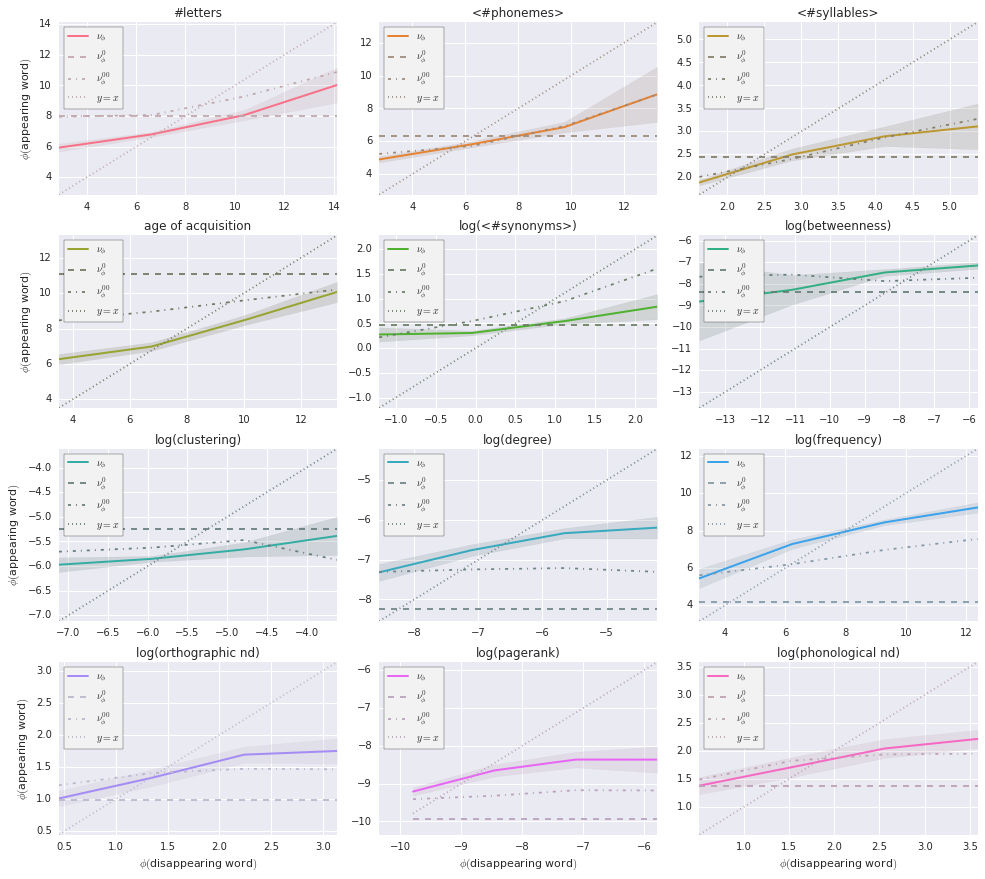

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

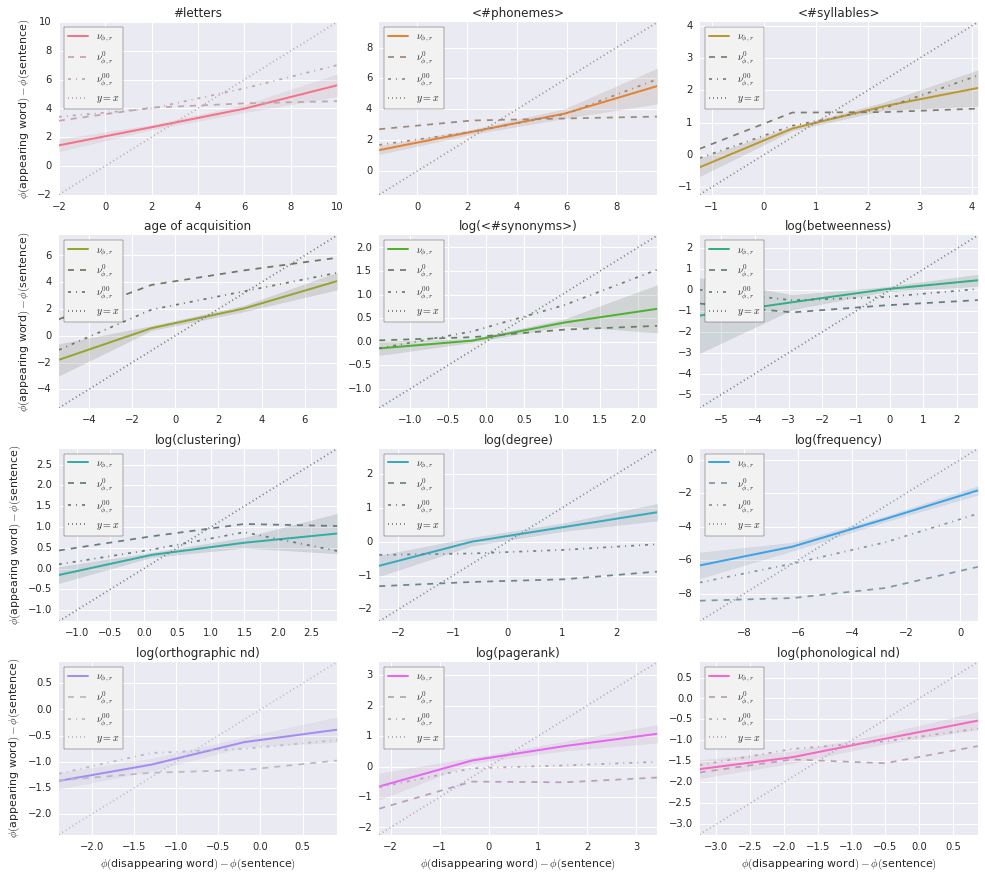

In [8]:
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

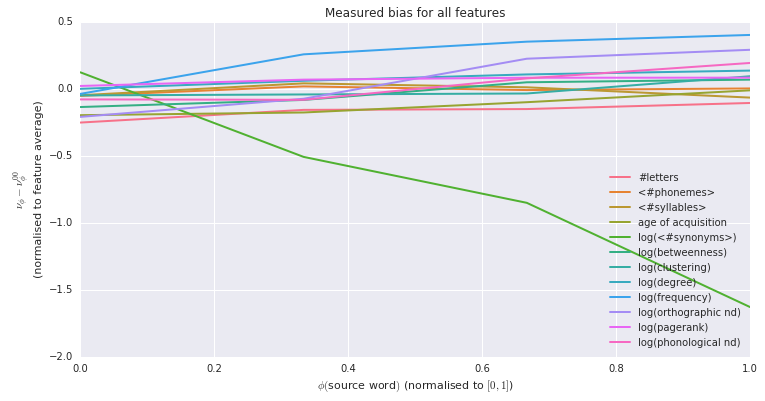

In [9]:
palette = sb.color_palette('husl', len(Substitution.__features__))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

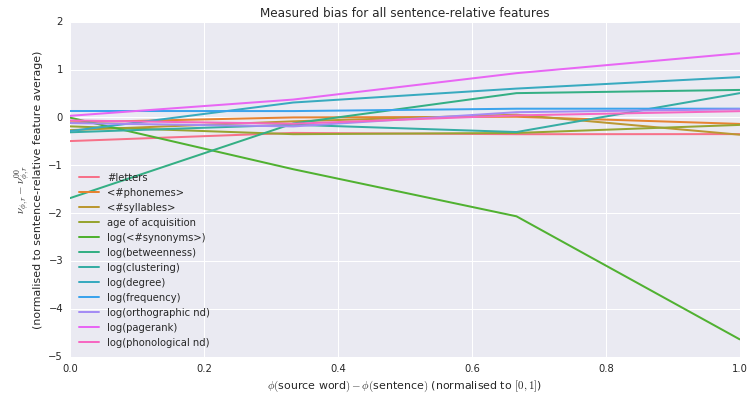

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False, relative=True)
ax.legend(loc='lower left')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

### 2.3 Feature variations, reduced to features we expose in the paper

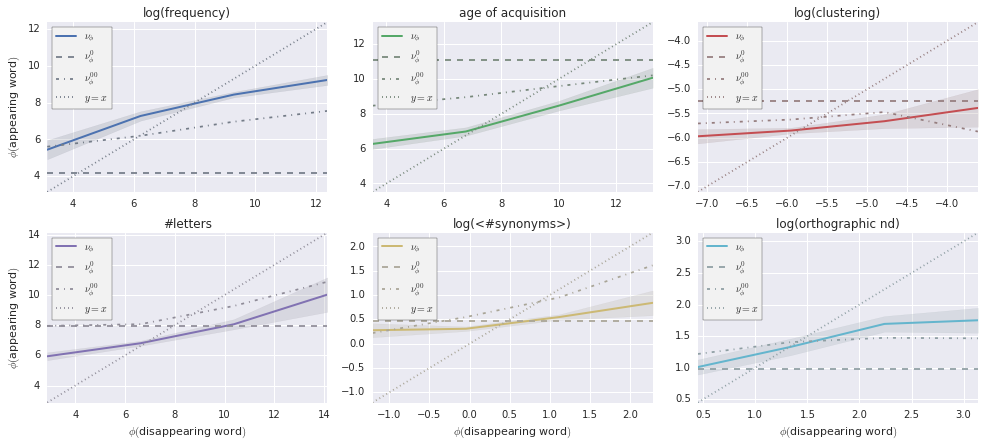

In [11]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

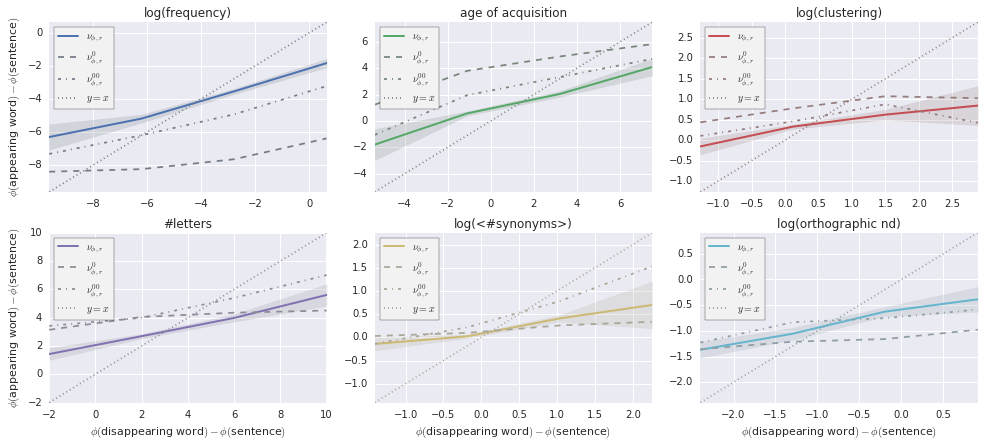

In [12]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Now $\nu_{\phi} - \nu_{\phi}^{00}$

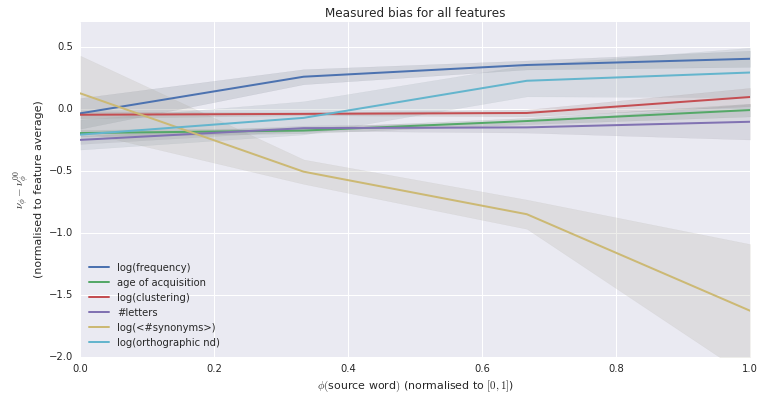

In [13]:
palette = sb.color_palette('deep', len(PAPER_FEATURES))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j])
ax.legend(loc='lower left')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

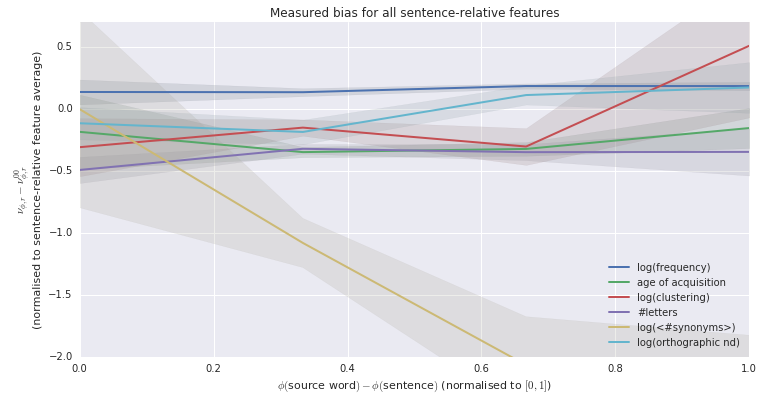

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], relative=True)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [15]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count, right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count, right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (dest[(x_bins == x) & (y_bins == y)] -
                              source[(x_bins == x) & (y_bins == y)]).mean()
            v_values[y, x] = (dest_rel[(x_bins == x) & (y_bins == y)] -
                              source_rel[(x_bins == x) & (y_bins == y)]).mean()
            strength[y, x] = np.sqrt((dest[(x_bins == x) & (y_bins == y)] - 
                                      source[(x_bins == x) & (y_bins == y)]) ** 2 +
                                     (dest_rel[(x_bins == x) & (y_bins == y)] - 
                                      source_rel[(x_bins == x) & (y_bins == y)]) ** 2).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


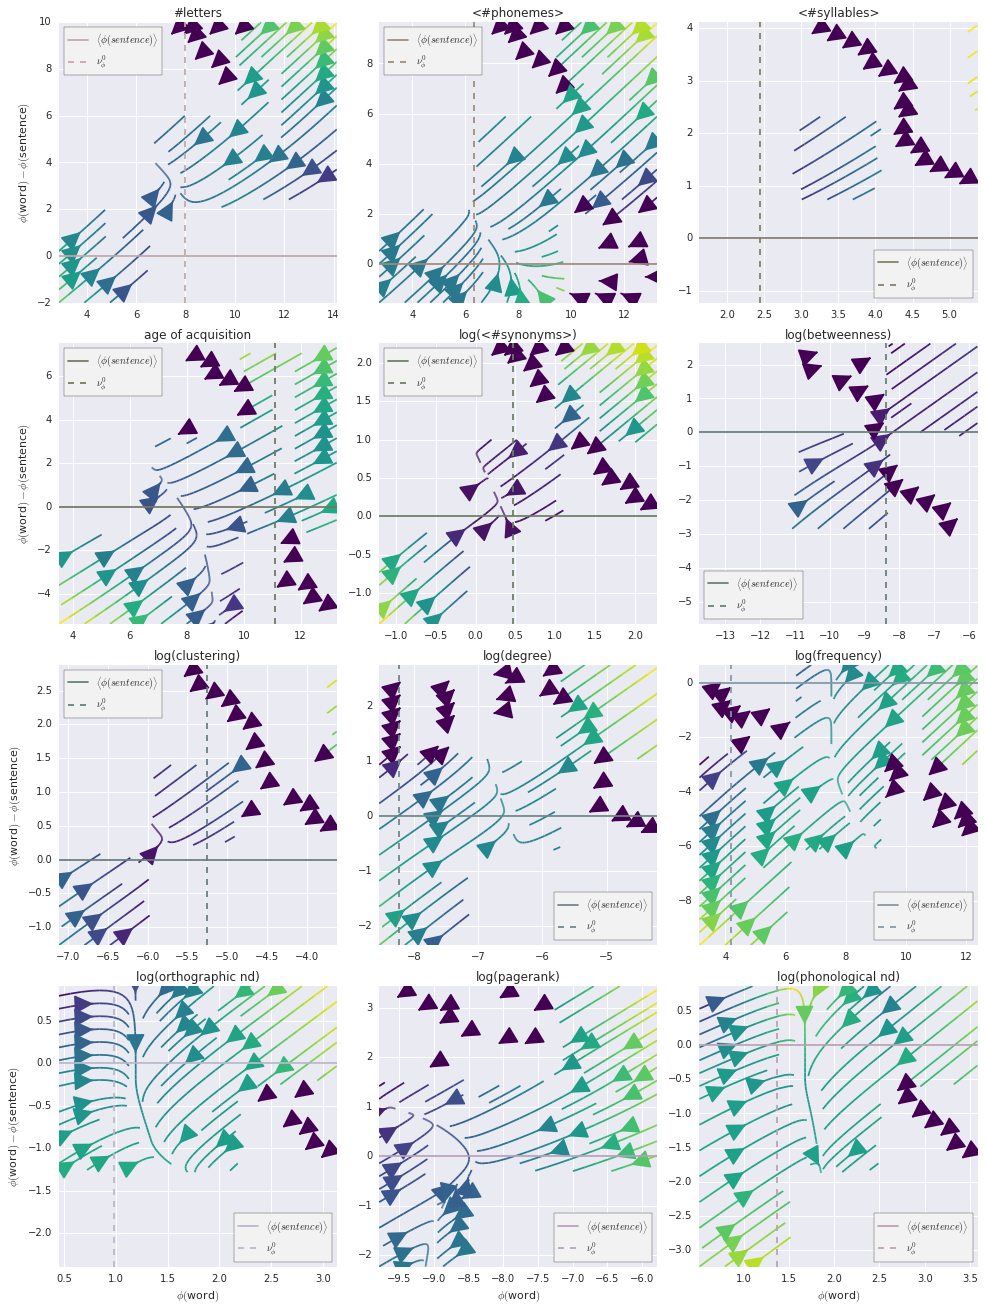

In [16]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


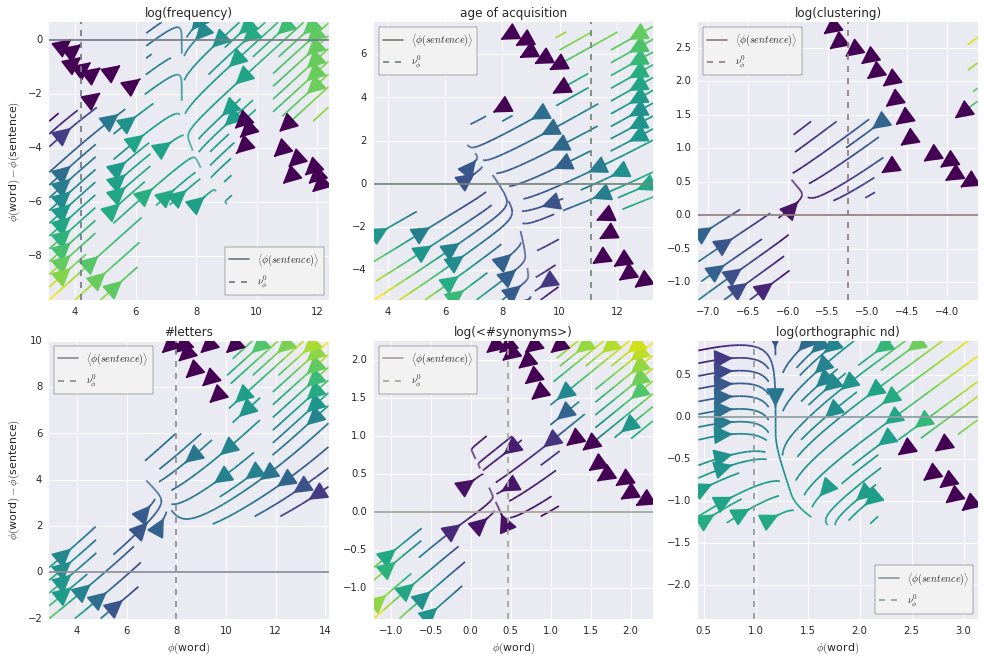

In [17]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account.

### 4.1 On all the features

Compute the actual PCA

In [18]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 11 components.

Those explain the following variance:
[ 0.51534902  0.17671196  0.08972311  0.07556167  0.03438925  0.03110435
  0.02053445  0.01889782  0.01653953  0.00917267  0.00698711]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.461468,0.294749,-0.083216,0.240305,0.246802,-0.425589,0.226019,0.290541,-0.389214,0.289516,-0.150425,-0.005337
Component-1,-0.279358,0.391734,-0.133067,0.293396,0.288349,0.424988,-0.184324,0.306566,0.425837,-0.254092,0.162775,-0.024528
Component-2,0.717009,0.188276,-0.114714,0.054653,0.638711,-0.121670,-0.016294,0.007877,-0.053854,0.074780,-0.011954,-0.050841


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [19]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 18226) |            | Elapsed Time: 0:00:39 ETA:  8 days, 7:05:17

  0% (  119 of 18226) |                    | Elapsed Time: 0:00:40 ETA:  0:01:54

  1% (  228 of 18226) |                    | Elapsed Time: 0:00:41 ETA:  0:01:36

  1% (  355 of 18226) |                    | Elapsed Time: 0:00:42 ETA:  0:01:37

  2% (  456 of 18226) |                    | Elapsed Time: 0:00:42 ETA:  0:01:38

  3% (  578 of 18226) |                    | Elapsed Time: 0:00:43 ETA:  0:01:39

  3% (  684 of 18226) |                    | Elapsed Time: 0:00:44 ETA:  0:01:38

  4% (  797 of 18226) |                    | Elapsed Time: 0:00:45 ETA:  0:01:39

  4% (  889 of 18226) |                    | Elapsed Time: 0:00:46 ETA:  0:01:44

  5% (  912 of 18226) |#                   | Elapsed Time: 0:00:46 ETA:  0:01:44

  5% ( 1027 of 18226) |#                   | Elapsed Time: 0:00:47 ETA:  0:01:44

  5% ( 1077 of 18226) |#                   | Elapsed Time: 0:00:51 ETA:  0:02:43

  6% ( 1140 of 18226) |#                   | Elapsed Time: 0:00:51 ETA:  0:02:48

  7% ( 1281 of 18226) |#                   | Elapsed Time: 0:00:52 ETA:  0:02:41

  7% ( 1367 of 18226) |#                   | Elapsed Time: 0:00:53 ETA:  0:02:42

  8% ( 1466 of 18226) |#                   | Elapsed Time: 0:00:54 ETA:  0:02:47

  8% ( 1573 of 18226) |#                   | Elapsed Time: 0:00:55 ETA:  0:02:48

  8% ( 1595 of 18226) |#                   | Elapsed Time: 0:00:55 ETA:  0:02:51

  9% ( 1740 of 18226) |#                   | Elapsed Time: 0:00:56 ETA:  0:02:34

 10% ( 1823 of 18226) |##                  | Elapsed Time: 0:00:57 ETA:  0:02:31

 10% ( 1946 of 18226) |##                  | Elapsed Time: 0:00:58 ETA:  0:01:28

 11% ( 2027 of 18226) |##                  | Elapsed Time: 0:00:59 ETA:  0:01:34

 11% ( 2051 of 18226) |##                  | Elapsed Time: 0:00:59 ETA:  0:01:41

 11% ( 2175 of 18226) |##                  | Elapsed Time: 0:01:00 ETA:  0:01:40

 12% ( 2279 of 18226) |##                  | Elapsed Time: 0:01:01 ETA:  0:01:34

 13% ( 2421 of 18226) |##                  | Elapsed Time: 0:01:02 ETA:  0:01:27

 13% ( 2507 of 18226) |##                  | Elapsed Time: 0:01:02 ETA:  0:01:26

 14% ( 2628 of 18226) |##                  | Elapsed Time: 0:01:03 ETA:  0:01:29

 15% ( 2734 of 18226) |###                 | Elapsed Time: 0:01:04 ETA:  0:01:33

 15% ( 2868 of 18226) |###                 | Elapsed Time: 0:01:05 ETA:  0:01:30

 16% ( 2962 of 18226) |###                 | Elapsed Time: 0:01:06 ETA:  0:01:21

 16% ( 3080 of 18226) |###                 | Elapsed Time: 0:01:07 ETA:  0:01:19

 17% ( 3190 of 18226) |###                 | Elapsed Time: 0:01:08 ETA:  0:01:24

 18% ( 3344 of 18226) |###                 | Elapsed Time: 0:01:09 ETA:  0:01:21

 18% ( 3418 of 18226) |###                 | Elapsed Time: 0:01:10 ETA:  0:01:21

 19% ( 3533 of 18226) |###                 | Elapsed Time: 0:01:11 ETA:  0:01:21

 20% ( 3646 of 18226) |####                | Elapsed Time: 0:01:12 ETA:  0:01:17

 20% ( 3803 of 18226) |####                | Elapsed Time: 0:01:13 ETA:  0:01:12

 21% ( 3874 of 18226) |####                | Elapsed Time: 0:01:14 ETA:  0:01:15

 22% ( 4010 of 18226) |####                | Elapsed Time: 0:01:15 ETA:  0:01:11

 22% ( 4101 of 18226) |####                | Elapsed Time: 0:01:15 ETA:  0:01:04

 23% ( 4229 of 18226) |####                | Elapsed Time: 0:01:16 ETA:  0:01:04

 23% ( 4329 of 18226) |####                | Elapsed Time: 0:01:17 ETA:  0:01:06

 24% ( 4475 of 18226) |####                | Elapsed Time: 0:01:18 ETA:  0:00:59

 25% ( 4557 of 18226) |#####               | Elapsed Time: 0:01:19 ETA:  0:00:56

 25% ( 4690 of 18226) |#####               | Elapsed Time: 0:01:20 ETA:  0:00:54

 26% ( 4785 of 18226) |#####               | Elapsed Time: 0:01:20 ETA:  0:00:56

 27% ( 4927 of 18226) |#####               | Elapsed Time: 0:01:21 ETA:  0:00:53

 27% ( 5013 of 18226) |#####               | Elapsed Time: 0:01:22 ETA:  0:00:52

 28% ( 5134 of 18226) |#####               | Elapsed Time: 0:01:23 ETA:  0:00:52

 28% ( 5240 of 18226) |#####               | Elapsed Time: 0:01:24 ETA:  0:00:57

 29% ( 5331 of 18226) |#####               | Elapsed Time: 0:01:25 ETA:  0:01:05

 30% ( 5468 of 18226) |######              | Elapsed Time: 0:01:26 ETA:  0:01:08

 30% ( 5586 of 18226) |######              | Elapsed Time: 0:01:27 ETA:  0:01:09

 31% ( 5696 of 18226) |######              | Elapsed Time: 0:01:28 ETA:  0:01:20

 31% ( 5831 of 18226) |######              | Elapsed Time: 0:01:29 ETA:  0:01:15

 32% ( 5924 of 18226) |######              | Elapsed Time: 0:01:30 ETA:  0:01:08

 33% ( 6063 of 18226) |######              | Elapsed Time: 0:01:31 ETA:  0:01:01

 33% ( 6152 of 18226) |######              | Elapsed Time: 0:01:32 ETA:  0:00:56

 34% ( 6266 of 18226) |######              | Elapsed Time: 0:01:33 ETA:  0:00:55

 35% ( 6380 of 18226) |#######             | Elapsed Time: 0:01:34 ETA:  0:00:54

 35% ( 6502 of 18226) |#######             | Elapsed Time: 0:01:35 ETA:  0:00:53

 36% ( 6607 of 18226) |#######             | Elapsed Time: 0:01:36 ETA:  0:00:53

 37% ( 6749 of 18226) |#######             | Elapsed Time: 0:01:37 ETA:  0:00:51

 37% ( 6835 of 18226) |#######             | Elapsed Time: 0:01:38 ETA:  0:00:51

 38% ( 6952 of 18226) |#######             | Elapsed Time: 0:01:39 ETA:  0:00:53

 38% ( 7063 of 18226) |#######             | Elapsed Time: 0:01:39 ETA:  0:00:52

 39% ( 7183 of 18226) |#######             | Elapsed Time: 0:01:40 ETA:  0:00:50

 40% ( 7291 of 18226) |########            | Elapsed Time: 0:01:41 ETA:  0:00:47

 40% ( 7407 of 18226) |########            | Elapsed Time: 0:01:42 ETA:  0:00:47

 41% ( 7519 of 18226) |########            | Elapsed Time: 0:01:43 ETA:  0:00:45

 41% ( 7654 of 18226) |########            | Elapsed Time: 0:01:44 ETA:  0:00:45

 42% ( 7747 of 18226) |########            | Elapsed Time: 0:01:45 ETA:  0:00:44

 43% ( 7869 of 18226) |########            | Elapsed Time: 0:01:46 ETA:  0:00:43

 43% ( 7974 of 18226) |########            | Elapsed Time: 0:01:47 ETA:  0:00:42

 44% ( 8090 of 18226) |########            | Elapsed Time: 0:01:48 ETA:  0:00:42

 45% ( 8202 of 18226) |#########           | Elapsed Time: 0:01:49 ETA:  0:00:44

 45% ( 8343 of 18226) |#########           | Elapsed Time: 0:01:50 ETA:  0:00:39

 46% ( 8430 of 18226) |#########           | Elapsed Time: 0:01:51 ETA:  0:00:35

 46% ( 8553 of 18226) |#########           | Elapsed Time: 0:01:52 ETA:  0:00:35

 47% ( 8658 of 18226) |#########           | Elapsed Time: 0:01:52 ETA:  0:00:34

 48% ( 8772 of 18226) |#########           | Elapsed Time: 0:01:53 ETA:  0:00:35

 48% ( 8886 of 18226) |#########           | Elapsed Time: 0:01:54 ETA:  0:00:32

 49% ( 9001 of 18226) |#########           | Elapsed Time: 0:01:55 ETA:  0:00:32

 50% ( 9113 of 18226) |##########          | Elapsed Time: 0:01:56 ETA:  0:00:30

 50% ( 9257 of 18226) |##########          | Elapsed Time: 0:01:57 ETA:  0:00:28

 51% ( 9341 of 18226) |##########          | Elapsed Time: 0:01:58 ETA:  0:00:28

 52% ( 9497 of 18226) |##########          | Elapsed Time: 0:01:59 ETA:  0:00:21

 52% ( 9569 of 18226) |##########          | Elapsed Time: 0:02:00 ETA:  0:00:23

 53% ( 9673 of 18226) |##########          | Elapsed Time: 0:02:01 ETA:  0:00:24

 53% ( 9797 of 18226) |##########          | Elapsed Time: 0:02:02 ETA:  0:00:25

 54% ( 9909 of 18226) |##########          | Elapsed Time: 0:02:03 ETA:  0:00:23

 55% (10025 of 18226) |###########         | Elapsed Time: 0:02:04 ETA:  0:00:19

 55% (10164 of 18226) |###########         | Elapsed Time: 0:02:05 ETA:  0:00:19

 56% (10253 of 18226) |###########         | Elapsed Time: 0:02:05 ETA:  0:00:18

 57% (10391 of 18226) |###########         | Elapsed Time: 0:02:06 ETA:  0:00:20

 57% (10480 of 18226) |###########         | Elapsed Time: 0:02:07 ETA:  0:00:14

 58% (10624 of 18226) |###########         | Elapsed Time: 0:02:08 ETA:  0:00:07

 58% (10708 of 18226) |###########         | Elapsed Time: 0:02:08 ETA:  0:00:03

 59% (10831 of 18226) |###########         | Elapsed Time: 0:02:09 ETA:  0:00:04

 60% (10936 of 18226) |############        | Elapsed Time: 0:02:10 ETA:  0:00:00

 60% (11066 of 18226) |############        | Elapsed Time: 0:02:11 ETA:  0:00:00

 61% (11164 of 18226) |############        | Elapsed Time: 0:02:12 ETA:  0:00:00

 62% (11346 of 18226) |############        | Elapsed Time: 0:02:13 ETA:  0:00:00

 62% (11392 of 18226) |############        | Elapsed Time: 0:02:13 ETA:  0:00:00

 63% (11532 of 18226) |############        | Elapsed Time: 0:02:14 ETA:  0:00:00

 63% (11620 of 18226) |############        | Elapsed Time: 0:02:15 ETA:  0:00:00

 64% (11755 of 18226) |############        | Elapsed Time: 0:02:16 ETA:  0:00:00

 65% (11847 of 18226) |#############       | Elapsed Time: 0:02:16 ETA:  0:00:00

 65% (11992 of 18226) |#############       | Elapsed Time: 0:02:17 ETA:  0:00:00

 66% (12075 of 18226) |#############       | Elapsed Time: 0:02:18 ETA:  0:00:00

 67% (12214 of 18226) |#############       | Elapsed Time: 0:02:19 ETA:  0:00:00

 67% (12303 of 18226) |#############       | Elapsed Time: 0:02:20 ETA:  0:00:00

 68% (12439 of 18226) |#############       | Elapsed Time: 0:02:21 ETA:  0:00:00

 68% (12531 of 18226) |#############       | Elapsed Time: 0:02:21 ETA:  0:00:00

 69% (12663 of 18226) |#############       | Elapsed Time: 0:02:22 ETA:  0:00:00

 70% (12759 of 18226) |##############      | Elapsed Time: 0:02:23 ETA:  0:00:00

 70% (12884 of 18226) |##############      | Elapsed Time: 0:02:24 ETA:  0:00:00

 71% (12987 of 18226) |##############      | Elapsed Time: 0:02:25 ETA:  0:00:00

 72% (13141 of 18226) |##############      | Elapsed Time: 0:02:26 ETA:  0:00:00

 72% (13214 of 18226) |##############      | Elapsed Time: 0:02:26 ETA:  0:00:00

 73% (13347 of 18226) |##############      | Elapsed Time: 0:02:27 ETA:  0:00:00

 73% (13442 of 18226) |##############      | Elapsed Time: 0:02:28 ETA:  0:00:00

 74% (13586 of 18226) |##############      | Elapsed Time: 0:02:29 ETA:  0:00:00

 75% (13670 of 18226) |###############     | Elapsed Time: 0:02:29 ETA:  0:00:00

 75% (13786 of 18226) |###############     | Elapsed Time: 0:02:30 ETA:  0:00:00

 76% (13898 of 18226) |###############     | Elapsed Time: 0:02:31 ETA:  0:00:00

 76% (14015 of 18226) |###############     | Elapsed Time: 0:02:32 ETA:  0:00:00

 77% (14126 of 18226) |###############     | Elapsed Time: 0:02:33 ETA:  0:00:00

 78% (14250 of 18226) |###############     | Elapsed Time: 0:02:34 ETA:  0:00:00

 78% (14353 of 18226) |###############     | Elapsed Time: 0:02:35 ETA:  0:00:00

 79% (14490 of 18226) |###############     | Elapsed Time: 0:02:36 ETA:  0:00:00

 80% (14581 of 18226) |################    | Elapsed Time: 0:02:37 ETA:  0:00:00

 80% (14725 of 18226) |################    | Elapsed Time: 0:02:38 ETA:  0:00:00

 81% (14809 of 18226) |################    | Elapsed Time: 0:02:38 ETA:  0:00:00

 81% (14918 of 18226) |################    | Elapsed Time: 0:02:39 ETA:  0:00:00

 82% (15037 of 18226) |################    | Elapsed Time: 0:02:40 ETA:  0:00:00

 83% (15164 of 18226) |################    | Elapsed Time: 0:02:41 ETA:  0:00:00

 83% (15265 of 18226) |################    | Elapsed Time: 0:02:42 ETA:  0:00:00

 84% (15402 of 18226) |################    | Elapsed Time: 0:02:43 ETA:  0:00:00

 85% (15493 of 18226) |#################   | Elapsed Time: 0:02:44 ETA:  0:00:00

 85% (15631 of 18226) |#################   | Elapsed Time: 0:02:45 ETA:  0:00:00

 86% (15720 of 18226) |#################   | Elapsed Time: 0:02:45 ETA:  0:00:00

 86% (15855 of 18226) |#################   | Elapsed Time: 0:02:46 ETA:  0:00:00

 87% (15948 of 18226) |#################   | Elapsed Time: 0:02:47 ETA:  0:00:00

 88% (16085 of 18226) |#################   | Elapsed Time: 0:02:48 ETA:  0:00:00

 88% (16176 of 18226) |#################   | Elapsed Time: 0:02:49 ETA:  0:00:00

 89% (16301 of 18226) |#################   | Elapsed Time: 0:02:50 ETA:  0:00:00

 90% (16404 of 18226) |##################  | Elapsed Time: 0:02:50 ETA:  0:00:00

 90% (16504 of 18226) |##################  | Elapsed Time: 0:02:51 ETA:  0:00:00

 91% (16632 of 18226) |##################  | Elapsed Time: 0:02:52 ETA:  0:00:00

 92% (16772 of 18226) |##################  | Elapsed Time: 0:02:53 ETA:  0:00:00

 92% (16860 of 18226) |##################  | Elapsed Time: 0:02:54 ETA:  0:00:00

 93% (17009 of 18226) |##################  | Elapsed Time: 0:02:55 ETA:  0:00:00

 93% (17087 of 18226) |##################  | Elapsed Time: 0:02:56 ETA:  0:00:00

 94% (17216 of 18226) |##################  | Elapsed Time: 0:02:57 ETA:  0:00:00

 95% (17315 of 18226) |################### | Elapsed Time: 0:02:57 ETA:  0:00:00

 95% (17425 of 18226) |################### | Elapsed Time: 0:02:58 ETA:  0:00:00

 96% (17543 of 18226) |################### | Elapsed Time: 0:02:59 ETA:  0:00:00

 97% (17688 of 18226) |################### | Elapsed Time: 0:03:00 ETA:  0:00:00

 97% (17771 of 18226) |################### | Elapsed Time: 0:03:01 ETA:  0:00:00

 98% (17905 of 18226) |################### | Elapsed Time: 0:03:02 ETA:  0:00:00

 98% (17999 of 18226) |################### | Elapsed Time: 0:03:02 ETA:  0:00:00

 99% (18141 of 18226) |################### | Elapsed Time: 0:03:03 ETA:  0:00:00

100% (18226 of 18226) |####################| Elapsed Time: 0:03:04 Time: 0:03:04


Compute cluster averages (so as not to overestimate confidence intervals).

In [20]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)

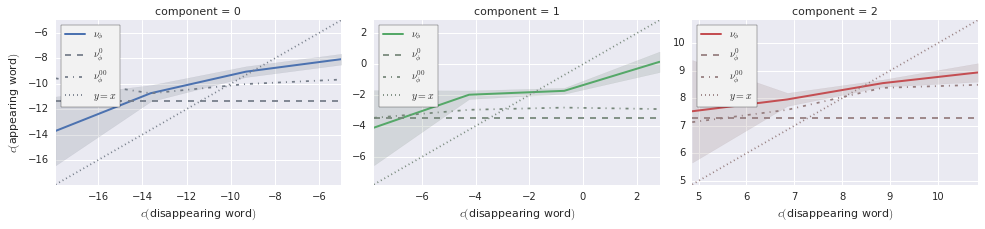

In [21]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On the features we expose in the paper

Compute the actual PCA

In [22]:
# Compute the PCA.
pcafeatures = tuple(sorted(PAPER_FEATURES))
pcavariations = variations[variations['feature'].map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 4 components.

Those explain the following variance:
[ 0.54468774  0.18101398  0.1629861   0.04405459]

We're plotting variation for the first 3 components:


,aoa,clustering,frequency,letters_count,orthographic_density,synonyms_count
Component-0,-0.689757,-0.092672,0.363782,-0.547790,0.288505,0.000205
Component-1,0.342776,0.111931,-0.571779,-0.677104,0.290802,-0.003056
Component-2,-0.630917,0.085444,-0.716216,0.277085,-0.051785,0.047109


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [23]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 18226) |           | Elapsed Time: 0:00:12 ETA:  2 days, 16:08:17

  0% (  127 of 18226) |                    | Elapsed Time: 0:00:13 ETA:  0:02:11

  1% (  228 of 18226) |                    | Elapsed Time: 0:00:14 ETA:  0:01:57

  1% (  362 of 18226) |                    | Elapsed Time: 0:00:15 ETA:  0:01:58

  2% (  456 of 18226) |                    | Elapsed Time: 0:00:16 ETA:  0:01:58

  3% (  587 of 18226) |                    | Elapsed Time: 0:00:17 ETA:  0:01:58

  3% (  684 of 18226) |                    | Elapsed Time: 0:00:17 ETA:  0:01:57

  4% (  804 of 18226) |                    | Elapsed Time: 0:00:18 ETA:  0:01:58

  5% (  912 of 18226) |#                   | Elapsed Time: 0:00:19 ETA:  0:02:02

  5% ( 1040 of 18226) |#                   | Elapsed Time: 0:00:20 ETA:  0:02:00

  6% ( 1140 of 18226) |#                   | Elapsed Time: 0:00:21 ETA:  0:02:03

  7% ( 1291 of 18226) |#                   | Elapsed Time: 0:00:22 ETA:  0:01:59

  7% ( 1367 of 18226) |#                   | Elapsed Time: 0:00:23 ETA:  0:01:57

  8% ( 1482 of 18226) |#                   | Elapsed Time: 0:00:24 ETA:  0:01:58

  8% ( 1595 of 18226) |#                   | Elapsed Time: 0:00:24 ETA:  0:02:00

  9% ( 1752 of 18226) |#                   | Elapsed Time: 0:00:25 ETA:  0:01:53

 10% ( 1823 of 18226) |##                  | Elapsed Time: 0:00:26 ETA:  0:01:46

 10% ( 1958 of 18226) |##                  | Elapsed Time: 0:00:27 ETA:  0:01:46

 11% ( 2051 of 18226) |##                  | Elapsed Time: 0:00:28 ETA:  0:01:49

 12% ( 2189 of 18226) |##                  | Elapsed Time: 0:00:29 ETA:  0:01:46

 12% ( 2279 of 18226) |##                  | Elapsed Time: 0:00:30 ETA:  0:01:47

 13% ( 2431 of 18226) |##                  | Elapsed Time: 0:00:31 ETA:  0:01:45

 13% ( 2507 of 18226) |##                  | Elapsed Time: 0:00:31 ETA:  0:01:43

 14% ( 2640 of 18226) |##                  | Elapsed Time: 0:00:32 ETA:  0:01:41

 15% ( 2734 of 18226) |###                 | Elapsed Time: 0:00:33 ETA:  0:01:44

 15% ( 2882 of 18226) |###                 | Elapsed Time: 0:00:34 ETA:  0:01:43

 16% ( 2962 of 18226) |###                 | Elapsed Time: 0:00:34 ETA:  0:01:41

 16% ( 3091 of 18226) |###                 | Elapsed Time: 0:00:35 ETA:  0:01:36

 17% ( 3190 of 18226) |###                 | Elapsed Time: 0:00:36 ETA:  0:01:37

 18% ( 3351 of 18226) |###                 | Elapsed Time: 0:00:37 ETA:  0:01:34

 18% ( 3418 of 18226) |###                 | Elapsed Time: 0:00:38 ETA:  0:01:37

 19% ( 3542 of 18226) |###                 | Elapsed Time: 0:00:39 ETA:  0:01:37

 20% ( 3646 of 18226) |####                | Elapsed Time: 0:00:40 ETA:  0:01:35

 20% ( 3813 of 18226) |####                | Elapsed Time: 0:00:41 ETA:  0:01:29

 21% ( 3874 of 18226) |####                | Elapsed Time: 0:00:41 ETA:  0:01:30

 22% ( 4021 of 18226) |####                | Elapsed Time: 0:00:42 ETA:  0:01:29

 22% ( 4101 of 18226) |####                | Elapsed Time: 0:00:43 ETA:  0:01:26

 23% ( 4243 of 18226) |####                | Elapsed Time: 0:00:44 ETA:  0:01:22

 23% ( 4329 of 18226) |####                | Elapsed Time: 0:00:44 ETA:  0:01:23

 24% ( 4491 of 18226) |####                | Elapsed Time: 0:00:45 ETA:  0:01:17

 25% ( 4557 of 18226) |#####               | Elapsed Time: 0:00:46 ETA:  0:01:14

 25% ( 4702 of 18226) |#####               | Elapsed Time: 0:00:47 ETA:  0:01:13

 26% ( 4785 of 18226) |#####               | Elapsed Time: 0:00:47 ETA:  0:01:14

 27% ( 4939 of 18226) |#####               | Elapsed Time: 0:00:48 ETA:  0:01:12

 27% ( 5013 of 18226) |#####               | Elapsed Time: 0:00:49 ETA:  0:01:10

 28% ( 5154 of 18226) |#####               | Elapsed Time: 0:00:50 ETA:  0:01:11

 28% ( 5240 of 18226) |#####               | Elapsed Time: 0:00:50 ETA:  0:01:14

 29% ( 5353 of 18226) |#####               | Elapsed Time: 0:00:51 ETA:  0:01:18

 30% ( 5468 of 18226) |######              | Elapsed Time: 0:00:52 ETA:  0:01:20

 30% ( 5602 of 18226) |######              | Elapsed Time: 0:00:53 ETA:  0:01:20

 31% ( 5696 of 18226) |######              | Elapsed Time: 0:00:54 ETA:  0:01:22

 32% ( 5846 of 18226) |######              | Elapsed Time: 0:00:55 ETA:  0:01:21

 32% ( 5924 of 18226) |######              | Elapsed Time: 0:00:56 ETA:  0:01:22

 33% ( 6072 of 18226) |######              | Elapsed Time: 0:00:57 ETA:  0:01:20

 33% ( 6152 of 18226) |######              | Elapsed Time: 0:00:57 ETA:  0:01:21

 34% ( 6282 of 18226) |######              | Elapsed Time: 0:00:58 ETA:  0:01:18

 35% ( 6380 of 18226) |#######             | Elapsed Time: 0:00:59 ETA:  0:01:14

 35% ( 6510 of 18226) |#######             | Elapsed Time: 0:01:00 ETA:  0:01:13

 36% ( 6607 of 18226) |#######             | Elapsed Time: 0:01:01 ETA:  0:01:14

 37% ( 6761 of 18226) |#######             | Elapsed Time: 0:01:02 ETA:  0:01:09

 37% ( 6835 of 18226) |#######             | Elapsed Time: 0:01:02 ETA:  0:01:10

 38% ( 6967 of 18226) |#######             | Elapsed Time: 0:01:03 ETA:  0:01:10

 38% ( 7063 of 18226) |#######             | Elapsed Time: 0:01:04 ETA:  0:01:10

 39% ( 7196 of 18226) |#######             | Elapsed Time: 0:01:05 ETA:  0:01:09

 40% ( 7291 of 18226) |########            | Elapsed Time: 0:01:06 ETA:  0:01:06

 40% ( 7421 of 18226) |########            | Elapsed Time: 0:01:07 ETA:  0:01:06

 41% ( 7519 of 18226) |########            | Elapsed Time: 0:01:07 ETA:  0:01:06

 42% ( 7666 of 18226) |########            | Elapsed Time: 0:01:08 ETA:  0:01:02

 42% ( 7747 of 18226) |########            | Elapsed Time: 0:01:09 ETA:  0:01:02

 43% ( 7892 of 18226) |########            | Elapsed Time: 0:01:10 ETA:  0:01:01

 43% ( 7974 of 18226) |########            | Elapsed Time: 0:01:11 ETA:  0:01:00

 44% ( 8107 of 18226) |########            | Elapsed Time: 0:01:12 ETA:  0:01:00

 45% ( 8202 of 18226) |#########           | Elapsed Time: 0:01:12 ETA:  0:00:58

 45% ( 8364 of 18226) |#########           | Elapsed Time: 0:01:13 ETA:  0:00:55

 46% ( 8430 of 18226) |#########           | Elapsed Time: 0:01:14 ETA:  0:00:54

 47% ( 8574 of 18226) |#########           | Elapsed Time: 0:01:15 ETA:  0:00:51

 47% ( 8658 of 18226) |#########           | Elapsed Time: 0:01:15 ETA:  0:00:50

 48% ( 8794 of 18226) |#########           | Elapsed Time: 0:01:16 ETA:  0:00:50

 48% ( 8886 of 18226) |#########           | Elapsed Time: 0:01:17 ETA:  0:00:49

 49% ( 9021 of 18226) |#########           | Elapsed Time: 0:01:18 ETA:  0:00:49

 50% ( 9113 of 18226) |##########          | Elapsed Time: 0:01:19 ETA:  0:00:48

 50% ( 9265 of 18226) |##########          | Elapsed Time: 0:01:20 ETA:  0:00:47

 51% ( 9341 of 18226) |##########          | Elapsed Time: 0:01:20 ETA:  0:00:48

 52% ( 9514 of 18226) |##########          | Elapsed Time: 0:01:21 ETA:  0:00:42

 52% ( 9569 of 18226) |##########          | Elapsed Time: 0:01:22 ETA:  0:00:43

 53% ( 9693 of 18226) |##########          | Elapsed Time: 0:01:23 ETA:  0:00:46

 53% ( 9797 of 18226) |##########          | Elapsed Time: 0:01:23 ETA:  0:00:44

 54% ( 9929 of 18226) |##########          | Elapsed Time: 0:01:24 ETA:  0:00:45

 55% (10025 of 18226) |###########         | Elapsed Time: 0:01:25 ETA:  0:00:42

 55% (10176 of 18226) |###########         | Elapsed Time: 0:01:26 ETA:  0:00:38

 56% (10253 of 18226) |###########         | Elapsed Time: 0:01:27 ETA:  0:00:38

 57% (10408 of 18226) |###########         | Elapsed Time: 0:01:28 ETA:  0:00:37

 57% (10480 of 18226) |###########         | Elapsed Time: 0:01:28 ETA:  0:00:39

 58% (10637 of 18226) |###########         | Elapsed Time: 0:01:29 ETA:  0:00:34

 58% (10708 of 18226) |###########         | Elapsed Time: 0:01:29 ETA:  0:00:30

 59% (10854 of 18226) |###########         | Elapsed Time: 0:01:30 ETA:  0:00:29

 60% (10936 of 18226) |############        | Elapsed Time: 0:01:31 ETA:  0:00:26

 60% (11084 of 18226) |############        | Elapsed Time: 0:01:32 ETA:  0:00:26

 61% (11164 of 18226) |############        | Elapsed Time: 0:01:32 ETA:  0:00:24

 62% (11350 of 18226) |############        | Elapsed Time: 0:01:33 ETA:  0:00:19

 62% (11392 of 18226) |############        | Elapsed Time: 0:01:34 ETA:  0:00:17

 63% (11539 of 18226) |############        | Elapsed Time: 0:01:35 ETA:  0:00:19

 63% (11620 of 18226) |############        | Elapsed Time: 0:01:35 ETA:  0:00:19

 64% (11767 of 18226) |############        | Elapsed Time: 0:01:36 ETA:  0:00:20

 65% (11847 of 18226) |#############       | Elapsed Time: 0:01:37 ETA:  0:00:18

 65% (12002 of 18226) |#############       | Elapsed Time: 0:01:38 ETA:  0:00:18

 66% (12075 of 18226) |#############       | Elapsed Time: 0:01:38 ETA:  0:00:18

 67% (12219 of 18226) |#############       | Elapsed Time: 0:01:39 ETA:  0:00:20

 67% (12303 of 18226) |#############       | Elapsed Time: 0:01:40 ETA:  0:00:24

 68% (12448 of 18226) |#############       | Elapsed Time: 0:01:41 ETA:  0:00:24

 68% (12531 of 18226) |#############       | Elapsed Time: 0:01:41 ETA:  0:00:23

 69% (12675 of 18226) |#############       | Elapsed Time: 0:01:42 ETA:  0:00:22

 70% (12759 of 18226) |##############      | Elapsed Time: 0:01:43 ETA:  0:00:23

 70% (12896 of 18226) |##############      | Elapsed Time: 0:01:44 ETA:  0:00:23

 71% (12987 of 18226) |##############      | Elapsed Time: 0:01:45 ETA:  0:00:23

 72% (13152 of 18226) |##############      | Elapsed Time: 0:01:46 ETA:  0:00:18

 72% (13214 of 18226) |##############      | Elapsed Time: 0:01:46 ETA:  0:00:16

 73% (13365 of 18226) |##############      | Elapsed Time: 0:01:47 ETA:  0:00:14

 73% (13442 of 18226) |##############      | Elapsed Time: 0:01:47 ETA:  0:00:12

 74% (13602 of 18226) |##############      | Elapsed Time: 0:01:48 ETA:  0:00:10

 75% (13670 of 18226) |###############     | Elapsed Time: 0:01:49 ETA:  0:00:09

 75% (13792 of 18226) |###############     | Elapsed Time: 0:01:50 ETA:  0:00:10

 76% (13898 of 18226) |###############     | Elapsed Time: 0:01:51 ETA:  0:00:09

 76% (14034 of 18226) |###############     | Elapsed Time: 0:01:52 ETA:  0:00:09

 77% (14126 of 18226) |###############     | Elapsed Time: 0:01:52 ETA:  0:00:11

 78% (14273 of 18226) |###############     | Elapsed Time: 0:01:53 ETA:  0:00:12

 78% (14353 of 18226) |###############     | Elapsed Time: 0:01:54 ETA:  0:00:12

 79% (14510 of 18226) |###############     | Elapsed Time: 0:01:55 ETA:  0:00:10

 80% (14581 of 18226) |################    | Elapsed Time: 0:01:55 ETA:  0:00:12

 80% (14745 of 18226) |################    | Elapsed Time: 0:01:56 ETA:  0:00:09

 81% (14809 of 18226) |################    | Elapsed Time: 0:01:57 ETA:  0:00:05

 81% (14941 of 18226) |################    | Elapsed Time: 0:01:58 ETA:  0:00:06

 82% (15037 of 18226) |################    | Elapsed Time: 0:01:58 ETA:  0:00:03

 83% (15186 of 18226) |################    | Elapsed Time: 0:01:59 ETA:  0:00:02

 83% (15265 of 18226) |################    | Elapsed Time: 0:02:00 ETA:  0:00:00

 84% (15415 of 18226) |################    | Elapsed Time: 0:02:01 ETA:  0:00:00

 85% (15493 of 18226) |#################   | Elapsed Time: 0:02:01 ETA:  0:00:01

 85% (15649 of 18226) |#################   | Elapsed Time: 0:02:02 ETA:  0:00:00

 86% (15720 of 18226) |#################   | Elapsed Time: 0:02:03 ETA:  0:00:00

 87% (15876 of 18226) |#################   | Elapsed Time: 0:02:04 ETA:  0:00:00

 87% (15948 of 18226) |#################   | Elapsed Time: 0:02:04 ETA:  0:00:00

 88% (16105 of 18226) |#################   | Elapsed Time: 0:02:05 ETA:  0:00:00

 88% (16176 of 18226) |#################   | Elapsed Time: 0:02:06 ETA:  0:00:00

 89% (16324 of 18226) |#################   | Elapsed Time: 0:02:07 ETA:  0:00:00

 90% (16404 of 18226) |##################  | Elapsed Time: 0:02:07 ETA:  0:00:00

 90% (16522 of 18226) |##################  | Elapsed Time: 0:02:08 ETA:  0:00:00

 91% (16632 of 18226) |##################  | Elapsed Time: 0:02:09 ETA:  0:00:00

 92% (16787 of 18226) |##################  | Elapsed Time: 0:02:10 ETA:  0:00:00

 92% (16860 of 18226) |##################  | Elapsed Time: 0:02:11 ETA:  0:00:00

 93% (17016 of 18226) |##################  | Elapsed Time: 0:02:12 ETA:  0:00:00

 93% (17087 of 18226) |##################  | Elapsed Time: 0:02:12 ETA:  0:00:00

 94% (17236 of 18226) |##################  | Elapsed Time: 0:02:13 ETA:  0:00:00

 95% (17315 of 18226) |################### | Elapsed Time: 0:02:14 ETA:  0:00:00

 95% (17445 of 18226) |################### | Elapsed Time: 0:02:15 ETA:  0:00:00

 96% (17543 of 18226) |################### | Elapsed Time: 0:02:15 ETA:  0:00:00

 97% (17703 of 18226) |################### | Elapsed Time: 0:02:16 ETA:  0:00:00

 97% (17771 of 18226) |################### | Elapsed Time: 0:02:17 ETA:  0:00:00

 98% (17921 of 18226) |################### | Elapsed Time: 0:02:18 ETA:  0:00:00

 98% (17999 of 18226) |################### | Elapsed Time: 0:02:18 ETA:  0:00:00

 99% (18156 of 18226) |################### | Elapsed Time: 0:02:19 ETA:  0:00:00

100% (18226 of 18226) |####################| Elapsed Time: 0:02:20 Time: 0:02:20


Compute cluster averages (so as not to overestimate confidence intervals).

In [24]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components

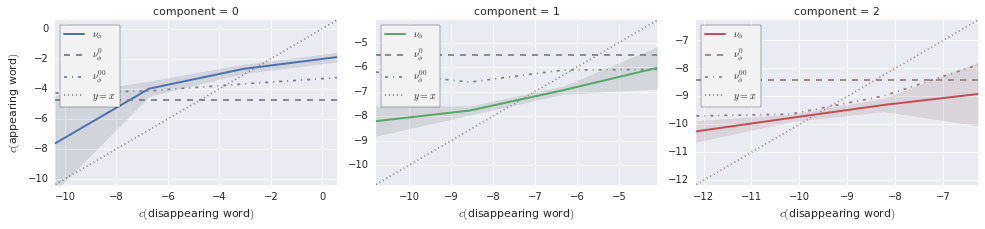

In [25]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `PAPER_FEATURES`). So note the following:

In [26]:
for feature in PAPER_FEATURES:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature) for feature in PAPER_FEATURES]:
    words.update(tfeature())

data = dict((feature, []) for feature in PAPER_FEATURES)
words_list = []
for word in words:
    words_list.append(word)
    for feature in PAPER_FEATURES:
        data[feature].append(Substitution._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'clustering' is based on 5739 words.
Feature 'letters_count' is based on 42786 words.
Feature 'synonyms_count' is based on 147306 words.
Feature 'orthographic_density' is based on 27751 words.



Among all the set of words used by these features, only 3322 are used.

Similarly, we mined 1796 (cluster-unique) substitutions, but the PCA is in fact computed on 616 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.